# 04-1 로지스틱 회귀

### 럭키백의 확률

#### 데이터 준비하기
- https://bit.ly/fish_csv_data

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Species 열에서 고유한 값만 추출해보기
# 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류(multi-class classification)이라고 한다.
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
# 입력 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [7]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [8]:
# target 데이터
fish_target = fish['Species'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### k-최근접 이웃 분류기의 확률 예측

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [17]:
print(kn.classes_)
# 이전에 유니크로 출력했던 순서와 다름 객체 내에서 알파벳순으로 번호 매겨짐

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
# 샘플의 타깃값 5개로 예측해보기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [20]:
import numpy as np
# 각 타깃에 대한 확률 보기(어떻게 예측했는지 ?? 과정??)
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4)) # ddcimals -> 소수 4쨰자리까지 나타내줘

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [22]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 4번째 값에 대해 가장 가까운 3개는 perch 2개, Roach1개이므로 확률기 각각 0.6667, 0.3333임을 확인가능

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀
- 로지스틱 회귀(logistic regression)는 이름은 회귀이지만 선형 방정식을 사용한 분류 모델입니다. 
- 종속변수가 확률이 되려면 0~1값을 가져야하고 종속변수가 아주 큰 음수일때 0이 되고, 아주 큰 양수일때 1이 되도록 시그모이드 함수(sigmoid function)을 사용한다.
- 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다.
    - 시그모이드 함수는 선형 방정식의 출력을 0과 1사이의 값으로 압축하며 이진 분류를 위해 사용한다.
    - 소프트맥스 함수는 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만든다.

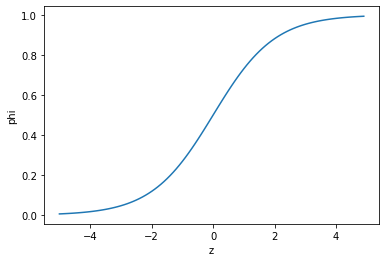

In [24]:
# 시그모이드 함수 그려보기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 1 / (1 + e^-z)
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 회귀로 이진 분류 수행하기

In [25]:
# 불리언 인덱싱(boolean indexing)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # True인 원소만 추출해준다.

['A' 'C']


In [30]:
# 도미와 빙어만 데이터만 추출해보기
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [32]:
# 로지스틱 모델로 학습하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [35]:
# 처음 5개 데이터에 어떻게 예측하는지 보기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [36]:
# 확률확인
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [40]:
print(lr.classes_) # smelt가 양성(1)로 된 것을 확인

['Bream' 'Smelt']


In [44]:
# 회귀 계수 확인 (z값 계산하기위한 회귀 계수)
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [45]:
# z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [48]:
# 시그모이드 함수로 확률 확인 결과 lr.predict와 동일함을 확인
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### 로지스틱 회귀로 다중 분류 수행하기
- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. 
    - max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100이다.
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. 이 규제를 L2 규제라고 한다. alpha 대신 매개변수 C를 이용
    - C 매개변수는 alpha와 반대로 작을수록 규제가 커집니다. C의 기본값은 1이다.

In [52]:
# 지금은 규제를 완화하기 위해 C를 20
# max_itersms 반복횟수가 부족하면 경고가 뜸
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 과적합도 없이 잘 작동하는것 같군...

0.9327731092436975
0.925


In [54]:
# 처음 테스트 세트의 5개에 대한 예측결과 확인
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [55]:
# 확률 계산
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [56]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [57]:
# 이진 분류에서는 시그모이드 함수를 사용하여 z를 0과 1사이의 값으로 변환했는데
# 다중 분류는 이와 달리 소프트맥스(softmax)함수를 사용하여 7개의 z값을 확률로 반환한다.
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


$$esum = e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$$

$$s1 = \frac{e^{z1}}{esum}, ..., s7 =\frac{e^{z7}}{esum}$$

In [59]:
# z1 ~ z7 값 계산
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [62]:
# softmax로 확률 계산
from scipy.special import softmax
proba = softmax(decision, axis = 1) # axis = 1 행기준
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 핵심 패키지와 함수
#### scikit-learn
- LogisticRegression은 선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스입니다.
    - solver 매개변수에서 사용할 알고리즘을 선택할 수 있다. 기본값은 'lbfgs'이다. 'sag'는 확률적 평균 경사 하강법 알고리즘으로 특성과 샘플 수가 많을때 성능은 빠르고 좋다. 'sag'의 개선 버전인 'saga'도 있다.
    - penalty 매개변수는 L2규제(릿지 방식)와 L1규제(라쏘 방식)를 선택할 수 있다. 기본값은 L2규제를 의미하는 'l2'이다.
    - C 매개변수는 규제의 강도를 제어한다. 기본값은 1.0이며 값이 작을수록 규제가 강해진다.
- predic_proba() 메서드는 예측 확률을 반환한다.
    - 이진 분류의 경우 샘플마다 음성 클래스, 양성 클래스에 대한 확률을 반환한다.
    - 다중 분류의 경우 샘플마다 모든 클래스에 대한 확률을 반환한다.
- decision_function()은 모델이 학습한 선형 방정식의 출력을 반환한다.
    - 이진 분류의 경우 양성 클래스의 확률이 반환된다. 이 값이 0보다 크면 양성 클래스, 작거나 같으면 음성 클래스로 예측한다.
    - 다중 분류의 경우 각 클래스마다 선형 방정식을 계산한다. 가장 큰 값의 클래스가 예측 클래스가 된다.

# 04-2 확률적 경사 하강법

### 점진적인 학습
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 훈련 방식을 점진적 학급이라고 부른다.
- 대표저긴 점진적 학습 알고리즘은 확률적 경사 하강법(Stochastic Gradien Descent)입니다.

#### 확률적 경사 하강법
- 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다. 이렇게 내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것이다.
- 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 이처럼 훈련 세트에서 랜덤하게 샘플을 고르는 것이 바로 확률적 경사 하강법이다.
- 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 떄까지 계속한다. 모든 샘플을 다 사용했으면 다시 처음부터 시작한다. 이렇게 만족할만한 위치에 도달할 때까지 계속 내려간다. 
    - 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 부른다.
    - 확률적 경사 하강법을 꼭 사용하는 알고리즘은 신경망 알고리즘(확률적 경사 하강법 or 미니배치 경사 하강법)이다.
- 1개씩 말고 무작위로 몇 개의 샘플을 선택해서 선택해서 경사를 내려가는 경사 하강법을 미니배치 경사 하강법(minibatch gradient descent)이라고 한다.
- 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘픙을 사용하는 방법응 배치 경사 하강법(batch gradient descent)이라고 부른다.

#### 손실 함수
- 손실 함수(loss function)는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 손실 함수의 값이 작을수고 좋지만 어떤 값이 최소인지는 모른다.
- 이진 분류에서는 로지스틱 손실함수(=이진 크로스엔트로피 손실함수)를 사용한다.
- 다중 분류에서는 크로스엔트로피 손실 함수(cross-entropy loss function)를 사용한다.
- 회귀 문제에는 평균 제곱 오차 손실 함수를 사용한다.

#### 로지스틱 손실 함수
- 혼공 머신러닝 + 딥러닝 p204~206 참고
- 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)라고 부른다.

### SGDClassifier
- https://bit.ly/fish_csv_data

In [63]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [64]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [65]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [80]:
# SGDClassifier 학습하기
from sklearn.linear_model import SGDClassifier

In [132]:
# 데이터를 모두 넣어서 배치 경사 하강법으로 볼수 있지만 알고리즘 내부에서 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행
# SGDClassifier는 미니배치 경사 하강법이나, 경사 하강법을 제공하지 않는다.
# loss = 'log'는 로지스식 손실함수를 의미
# log 라고 입력하면 다중분류일떄 소프트맥스, 이진분류일때 시그모이드로 구분하는듯
sc = SGDClassifier(loss = 'log', max_iter=10, random_state = 42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 반복 횟수가 10번으로 부족해서 ConvergenceWarning

0.773109243697479
0.775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [133]:
# 모델을 이어서 훈련하기
# partial_fit을 이용하여 모델을 이어서 훈련가능하고 호출할 때마다 1 에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 훈련할수록 성능이 좋아지네?? 얼마나 더 해야할까??
# 에포크가 진행될수록 꾸준히 증가하지만 테스트 점수는 어느 순간 감소한다. 이 지점이 시작하기 전에 훈련을 멈룬다. 
# 이를 조기 종료(early stopping)라고한다.

0.8151260504201681
0.825


In [134]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [135]:
# 300번의 에포크 동안 훈련을 반복진행 해보자
for _ in range(0, 300): # _는 자중에 사용하지 않고 그냥 버리는 값
    # classes should include all valid labels that can be in y
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

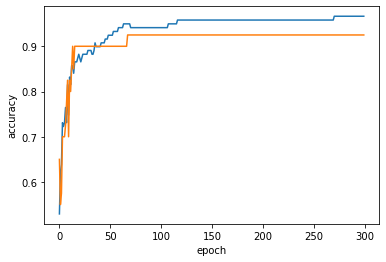

In [136]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 대략 100번쨰 에포크 이후에는 훈련세트의 점수만 높아지는 것을 확인가능
# 에포크를 100으로 맞추고 다시 해보자

In [137]:
# tol 매개변수에서 향상될 최솟값을 지정하여 무조건 max_iter = 100 만큼 반복한다.
sc = SGDClassifier(loss = 'log', max_iter =100, tol =None, random_state = 42) 
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [138]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [139]:
# SGDClassifier의 loss 매개변수의 기본값으 'hinge' -> 서포트 벡터 머신이라고 불린다.

In [140]:
# 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해보자
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


### 핵심 패키지와 함수
#### scikit-learn
- SGDClassifier는 확률적 경사 하강법을 사용한 분류 모델이다.
    - loss 매개변수는 확률적 경사 항강법으로 최적화된 손실 함수를 지정한다. 기본값은 서포트 벡터 머신을 위한 'hinge'손실 함수이고 로지스틱 회귀를 위해서는 'log'로 지정한다.
    - penalty 매개변수에서 규제의 종류를 지정한다. 기본값은 L2 규제를 위한 'l2'이고, L1 규제하려면 'l1'을 지정한다. 규제 강도는 alpha 매개변수에서 지정하고 기본값은 0.0001이다
    - max_iter 매개변수는 에포크 횟수를 지정한다. 기본값은 1000이다.
    - tol 매개변수는 반복을 멈출 조건이다. n_iter_no_change 매개변수는 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단된다. tol 매개변수의 기본값은 0.001 이고 n_iter_no_change 매개변수의 기본값은 5이다.
- SGDRegressor는 확률적 경사 하강법을 사용한 회귀 모델이다.
    - loss 매개변수에서 손실 함수를 지정한다. 기본값은 제곱 오차를 나타내는 'squared_loss'이다.
    - 나머지 매개변수는 SGDClassifier와 동일하다